# Explore Anndata with Napari

In this tutorial we show to visualize the `Image Container` and `Anndata` in `Napari`.

It can be useful to explore the results of Scanpy/Squidpy analysis in an interactive way. [Napari](https://napari.org/) is a multi-dimensional image viewer for python, which makes it very convenient for this purpose.
In this tutorial, we will show how Squidpy allows a seamless integration of napari with the anndata object, making it very easy to interactively explore the analysis results.
FOr this tutorial, you might have to install additional libraries, make sure that you installed Squidpy with `pip install 'squidpy[all]'`.

As usual, let's import relevant libraries and load the data.

In [1]:
import scanpy as sc
import squidpy as sq
import numpy as np

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

/Users/giovanni.palla/.local/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.0) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


scanpy==1.7.0rc2.dev1+g2a123065 anndata==0.7.4 umap==0.4.6 numpy==1.19.4 scipy==1.5.2 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2
squidpy==0.0.0


In [2]:
adata = sq.datasets.visium_hne_adata()
img = sq.datasets.visium_hne_image()

In order to use Napari in the current interactive jupyter session, we'll have to start the qt gui with the following magic command.

In [3]:
%gui qt

In the following line, we actually start Napari. You will notice that an additional windows will pop up with the Napari viewer.
We assign the Napari viewer to a new variable, `viewer`, in order to perform some useful manipulations, for instance visualizing screenshots.

In [4]:
viewer = img.interactive(adata)

We can always visualize the Napari session in this notebook, by conveniently capturing a screenshot of the current image. This can be done with `viewer.screenshot()`
All of the functionalities described are based on Napari layers and widget. You might want to familiarize yourself with some Napari [tutorials](https://napari.org/tutorials/).

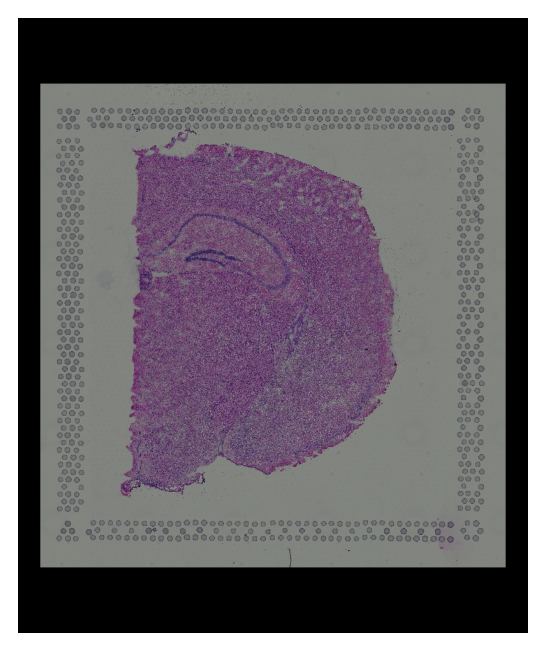

In [5]:
viewer.screenshot()

On the right side of the Napari widget, you can select and visualize the different slots in the AnnData object, such as:
- Genes (from the default layer or other layers such as `adata.raw`)
- Observations (such as clustering results and other features)
- Features saved in `adata.obsm`, for instance PCA results, or iamge feature

The widgets are searchable, meaning that you can type the initial of e.g. your favourit gene and the menu will scroll in the location automatically. In order to visualize the feature of interest as an additiona layer, you can either press `Enter` or double-click on it.

For instance, let's visualize the expression levels for `Olig1`

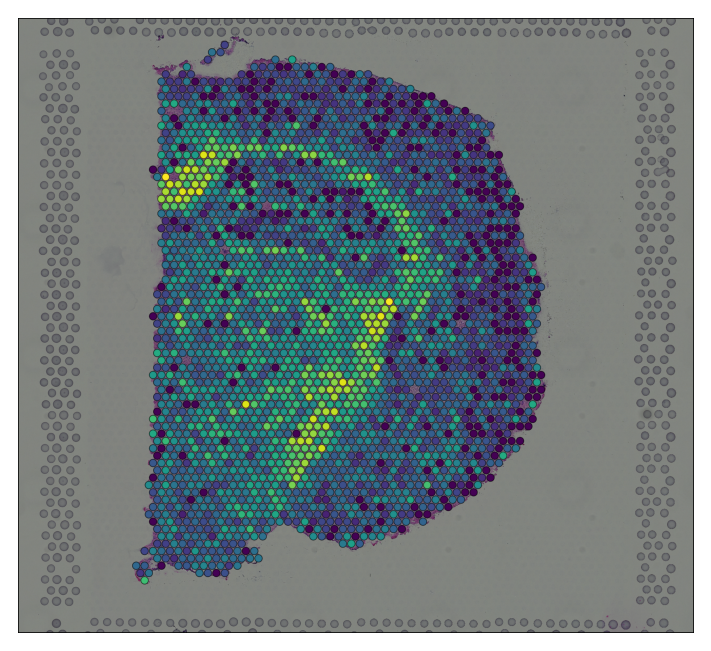

In [6]:
viewer.screenshot()

Or the clustering annotation saved under `adata.obs["cluster"]`

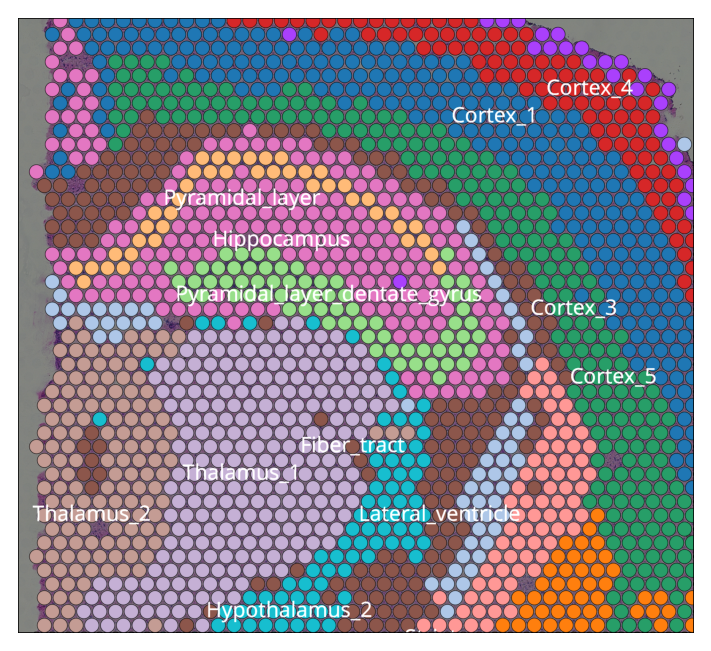

In [8]:
viewer.screenshot()

In both cases, you can change several parameters of how the layers are displayed in Napari. For instance, you can change the `opacity` in order to visualize two layers on top of each other, or you can toggle the text off.

### Annotate tissue regions with the Shape layer

Napari does not only serve as an interactive image viewer, but you can also annotate manually regions of interest in the tissue. For that, you need to select the `Shape layer` in Napari (widget on the left-side, icon shaped like a trapezoid), then select the `add polygons` icon and draw the polygon in the region of interest. You can have a look at the Napari [shapes layer tutorial](https://napari.org/tutorials/fundamentals/shapes) for further instructions.

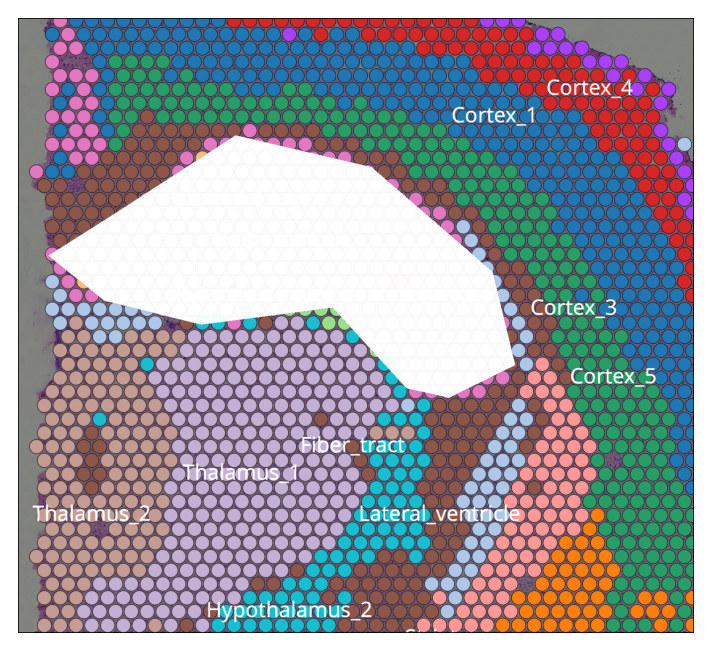

In [9]:
viewer.screenshot()

In this example, we annotated the Hippocampus region. We can now select all the spots that belongs to that white tissue area, by simply pressing `shift+E`. The shape layer is exported as a `bool` Pandas series in `adata.obs`: all the spots under the tissue area will have value `True`, whereas the other will have value `False`.
Interactive regions annotation is particularly useful in pathology settings, such as Cancer tissue. What usualy happens is that pathologist annotate regions of the tissue of interest wwith based on their expertise in discriminating e.g. stromal tissue from cancer or lymphoid infiltrates. The ability to translate such annotation to the anndata object, in an easy and interactive way has great potential. 

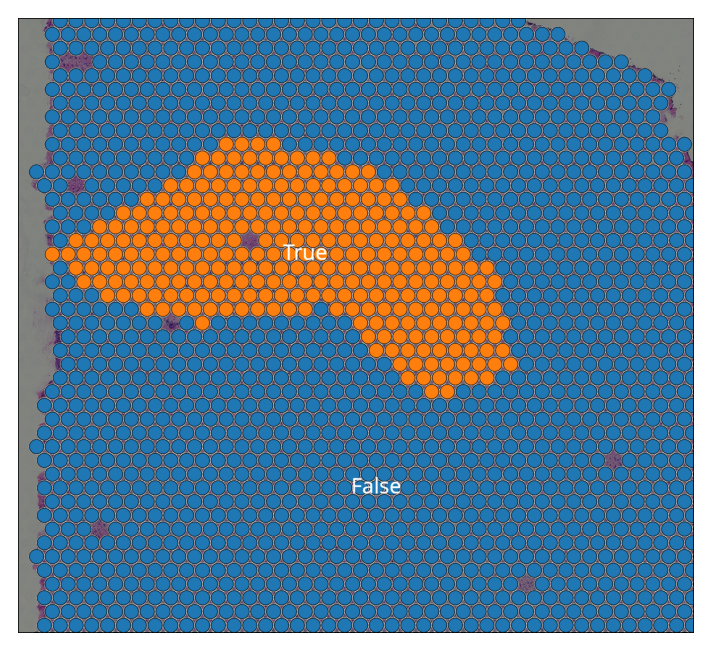

In [10]:
viewer.screenshot()

As mentioned before, the values of this pandas series are saved in the AnnData object: `adata.obs[Hippocampus_shapes"]`. This means that we can also access and visualize this label with Scanpy.

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


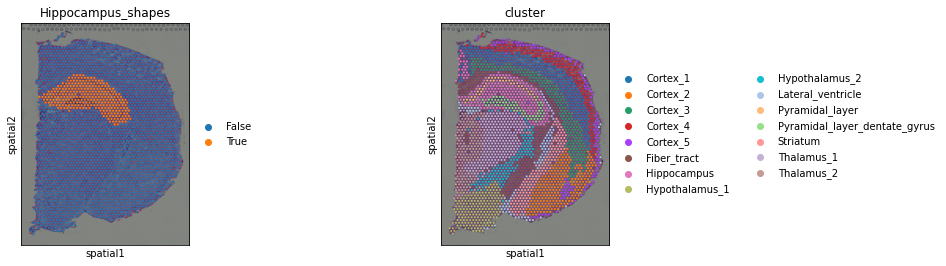

In [11]:
sc.pl.spatial(adata, color=["Hippocampus_shapes", "cluster"])

You can of course select multiple regions under the same `Shape layer`, or select multiple shape layers and save them with different labels. We hope you find this functionality useufl, let us know your feedback in the [squidpy issue](https://github.com/theislab/squidpy/issues)